In [53]:
import numpy as np
from numpy import random as rd
import time
# from solvers_listos import *
from funciones import *
import seaborn as sns

In [54]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print
# el print es porque se corre allá

NameError: name 'd' is not defined

NameError: name 'd' is not defined

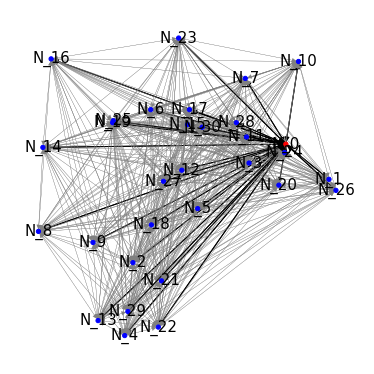

In [ ]:
np.random.seed(0)
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n30full.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'o', T=1000, P=12)

In [ ]:
#rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 360)
rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                           tipo_demanda = 'o', T = 360, P=12)

Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_10', 'N_28', 'N_11', 'N_3', 'N_5', 'N_27', 'N_30', 'N_6', 'N_16', 'N_14', 'N_8', 'N_4', 'N_22', 'N_0'] | costo_SO: 471.221283704221 | costo_r: 1892.306608279071
Tiempo: 3 | Ruta: ['N_0', 'N_26', 'N_20', 'N_24', 'N_7', 'N_17', 'N_15', 'N_12', 'N_18', 'N_2', 'N_21', 'N_29', 'N_13', 'N_9', 'N_19', 'N_25', 'N_23', 'N_0'] | costo_SO: 0 | costo_r: 1613.9637880286741
Tiempo: 4 | Ruta: ['N_0', 'N_1', 'N_10', 'N_28', 'N_30', 'N_22', 'N_4', 'N_8', 'N_27', 'N_6', 'N_16', 'N_0'] | costo_SO: 97.47766421540693 | costo_r: 1934.6868753380236
Tiempo: 5 | Ruta: ['N_0', 'N_7', 'N_17', 'N_25', 'N_19', 'N_14', 'N_9', 'N_13', 'N_29', 'N_21', 'N_2', 'N_18', 'N_5', 'N_12', 'N_15', 'N_11', 'N_3', 'N_24', 'N_20', 'N_26', 'N_0'] | costo_SO: 36.610187922909255 | costo_r: 1637.0959315328787
Tiempo: 6 | Ruta: ['N_0', 'N_1', 'N_10', 'N_23', 'N_28', 'N_30', 'N_22', 'N_4', 'N_27', 'N_6', 'N_16', 'N_0'] | costo_SO: 41.48822829133225 | costo_r: 1973.1964274995162
Tiempo: 7 | Ruta: ['N

In [ ]:
#rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 360, F = 15, cap = 871)
rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(grafo_inicial = G, dem_historico=historia, T = 360, F = 15, cap = 871,
                                                                               tipo_demanda = 'o', P=12)

Inicial LS: [], costo SO = 0.0
Final LS: {0: [], 1: [], 2: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], 3: [], 4: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_12', 'N_5', 'N_1', 'N_26', 'N_29', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], 5: ['N_0', 'N_0'], 6: ['N_0', 'N_24', 'N_25', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_20', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_21', 'N_4', 'N_13', 'N_22', 'N_18', 'N_12', 'N_27', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], 7: ['N_0', 'N_0'], 8: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29',

In [ ]:
insatisf_R = []
insatisf_P = []
print(len(costos_R[0]))
for dia in range(len(dems_P)):
    insatisf_R.append(costos_R[0][dia]/sum(dems_P[dia].values()))
    insatisf_P.append(costos_P[0][dia]/sum(dems_P[dia].values()))

len(insatisf_P)


360


360

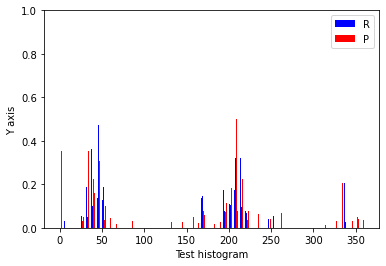

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#The data

#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(len(insatisf_R))]
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, insatisf_R, width, color = 'b', label = 'R', align='edge')
ax.bar(range(len(insatisf_P)), insatisf_P,width, color = 'r', label = 'P', align='edge')

ax.set_xlabel('Test histogram')
ax.set_ylabel('Y axis')
plt.ylim(0,1)
plt.legend()
plt.show()

(0.0, 2000.0)

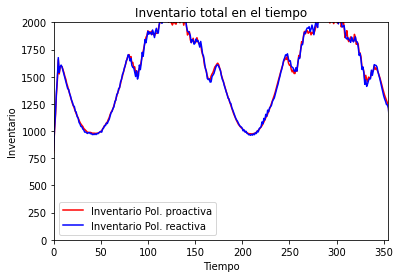

In [ ]:
plt.plot(smooth(inventarios_R, 10), color = 'red', label = 'Inventario Reactiva')
plt.plot(smooth(inventarios_P, 10), color = 'blue', label = 'Inventario Proactiva')

plt.xlabel('Tiempo')
plt.ylabel('Inventario')
plt.title('Inventario total en el tiempo')
plt.legend(['Inventario Pol. proactiva', 'Inventario Pol. reactiva'])
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0000,2000)

In [ ]:
# for i in range(60):
#     print(costos_R[0][i], costos_R[1][i])

costo_total_P = [costos_P[0][i] + costos_P[1][i] for i in range(len(costos_P[0]))]
costo_total_R = [costos_R[0][i] + costos_R[1][i] for i in range(len(costos_R[0]))]

(0.0, 2000.0)

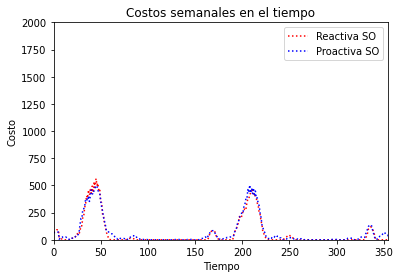

In [ ]:
plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

(0.0, 2000.0)

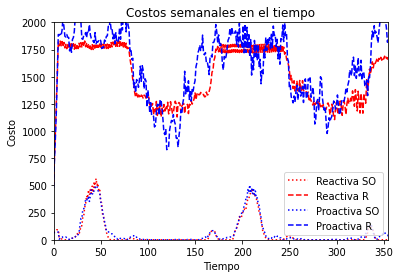

In [ ]:
# plt.plot(smooth(inventarios_P, 7), color = 'red')
# plt.plot(smooth(inventarios_R, 7), color = 'blue')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

In [ ]:
costo_total_P_inv = [costos_P[0][i]*3 + costos_P[1][i] + inventarios_P[i]*2 for i in range(len(costos_P[0]))]
costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

(0.0, 2500.0)

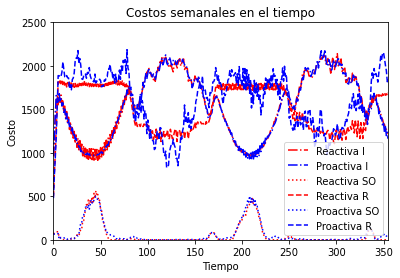

In [ ]:
plt.plot(smooth(inventarios_R, 7), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(inventarios_P, 7), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2500)

(0.0, 355.0)

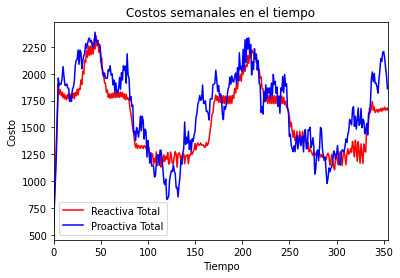

In [ ]:
plt.plot(smooth(costo_total_R, 7), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(costo_total_P, 7), color = 'blue', label = 'Proactiva Total')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,2000)

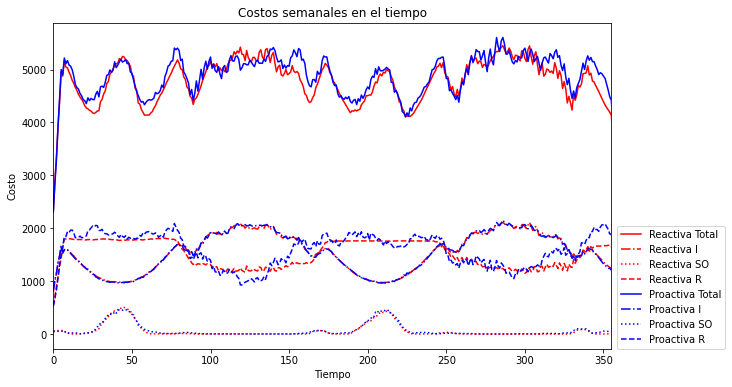

In [ ]:

plt.figure(figsize=(10,6))

plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costo_total_P_inv, 10), color = 'blue', label = 'Proactiva Total')
plt.plot(smooth(inventarios_P, 10), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')
plt.plot(smooth(costos_P[0], 10), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 10), color = 'blue', linestyle = '--', label = 'Proactiva R')


plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
# plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,6000)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
l2 = plt.legend(bbox_to_anchor=(1.01, 0), loc="lower left", borderaxespad=0)
plt.show()

[0.5470860902283448, 0.06399842893604152, 1.1166457569026822] [0.5758821118911739, 0.07425733506987059, 1.116519167529211]


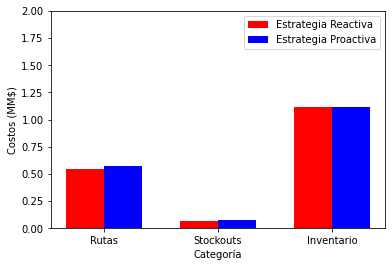

In [ ]:
# plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
# plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
# plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
# plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

costo_rutas_R = np.sum(costos_R[1])/1000000
costo_SO_R = np.sum(costos_R[0])*3/1000000
costo_inv_R = np.sum(inventarios_R)*2/1000000
CR = [costo_rutas_R, costo_SO_R, costo_inv_R]

costo_rutas_P = np.sum(costos_P[1])/1000000
costo_SO_P = np.sum(costos_P[0])*3/1000000
costo_inv_P = np.sum(inventarios_P)*2/1000000
CP = [costo_rutas_P, costo_SO_P, costo_inv_P]
#The data
print(CR, CP)
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(3)]
fig = plt.figure()
ax = fig.add_subplot(111)

# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, CR, width, color = 'r', label = 'Estrategia Reactiva', align='edge')
ax.bar(range(3), CP, width, color = 'b', label = 'Estrategia Proactiva', align='edge')
plt.xticks([0, 1, 2],['Rutas', 'Stockouts', 'Inventario'])
plt.xlabel('Categoría')
plt.ylabel('Costos (MM\$)')
plt.legend()
plt.ylim(0,2)
plt.show()

[74257.33506987059, 575882.1118911739, 1116519.167529211]


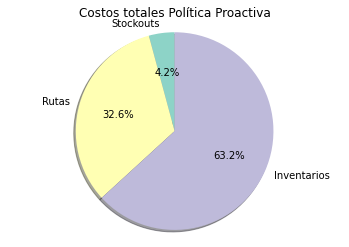

In [ ]:
# costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_P[0])*3, np.sum(costos_P[1]), np.sum(inventarios_P)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('Set3')
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Proactiva')
plt.show()

In [ ]:
CR_R = []
for cr in costos_R[1]:
    if cr == np.inf:
        CR_R.append(0)
    else:
        CR_R.append(cr)

[63998.42893604152, 547086.0902283448, 1116645.7569026821]


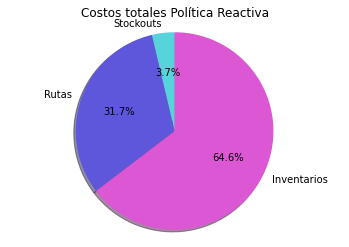

In [ ]:
labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_R[0])*3, np.sum(CR_R), np.sum(inventarios_R)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('hls')[3:]
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Reactiva')
plt.show()

In [ ]:
#cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
#cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

#print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
#print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [ ]:
#datos = dispersion_intervalos(df)
        
#df_nodos['mean'] = datos['mean']
#df_nodos['std'] = datos['std']
#df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
#df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
#df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
#df_nodos

In [ ]:
#df_nodos_corr.corr()

<AxesSubplot: >

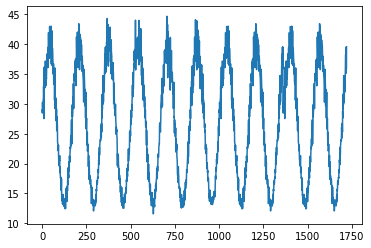

In [52]:
# queremos plotear el diccionario historia
historia_df = pd.DataFrame(historia).T
historia_df.iloc[0].plot()

In [23]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 860.6800086018693
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_6', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1218.8235182120784
Tiempo: 3 | Ruta: ['N_0', 'N_2', 'N_1', 'N_3', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1110.7326908361815
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_6', 'N_0'] | costo_SO: 34.89504002583927 | costo_r: 1058.8611711229453
Tiempo: 5 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_7', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1124.5699077797674
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1082.9437789392941
Tiempo: 7 | Ruta: ['N_0', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 67.5184408

ValueError: too many values to unpack (expected 3)

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_9', 'N_0'] | costo_SO: 27.301219897538406 | costo_r: 455.3089379701961
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_5', 'N_8', 'N_6', 'N_1', 'N_2', 'N_0'] | costo_SO: 98.47554625490424 | costo_r: 1102.0249480849036
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_0'] | costo_SO: 28.54844703812384 | costo_r: 1131.4304439435969
Tiempo: 4 | Ruta: ['N_0', 'N_2', 'N_1', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 140.44971593563858 | costo_r: 1077.181123030171
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_3', 'N_6', 'N_0'] | costo_SO: 187.18774454246477 | costo_r: 1079.2855709534842
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 13

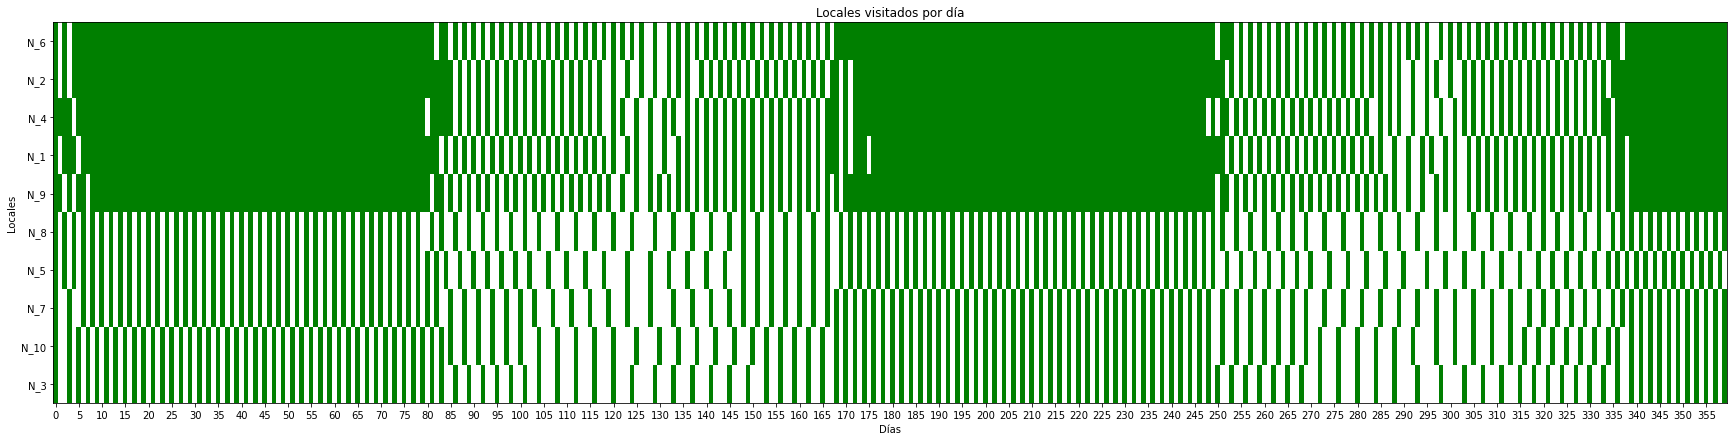

Listo n10empty.xlsx
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 274.081346383557 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 47.06273391954048 | costo_r: 1319.2680085395832
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_2', 'N_8', 'N_0'] | costo_SO: 249.20095996135268 | costo_r: 1071.3438679183068
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 68.76043691688231 | costo_r: 1243.6909914125158
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_1', 'N_6', 'N_8', 'N_0'] | costo_SO: 115.22409495137676 | costo_r: 1060.8289535183753
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1243.6909914125158
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | c

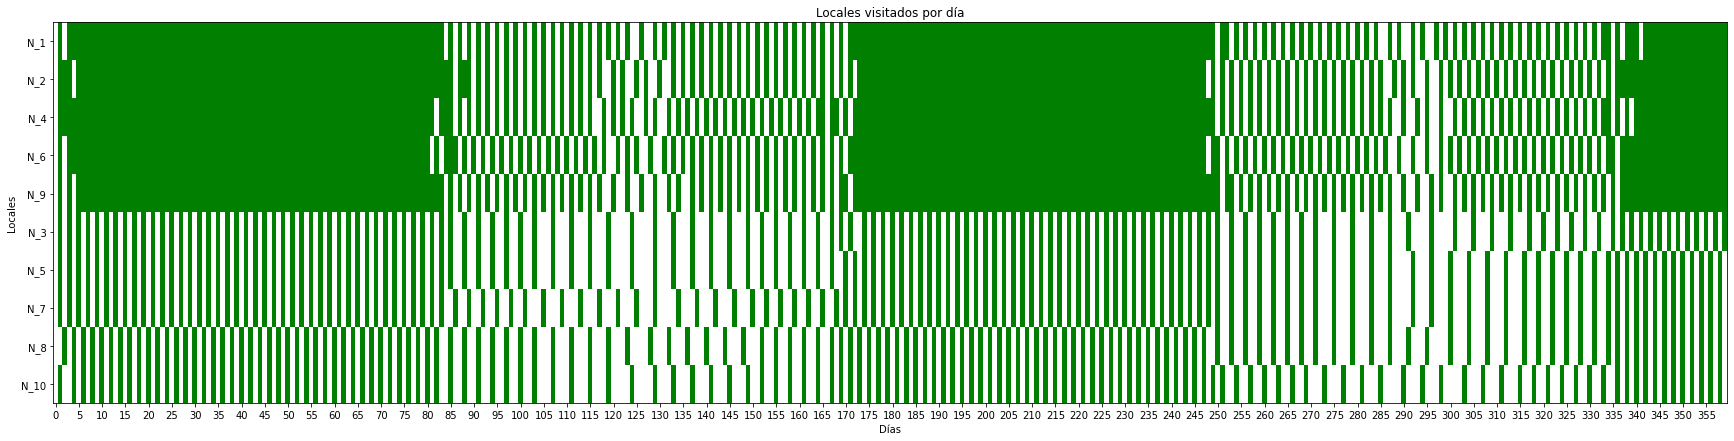

Listo n10estandar.xlsx
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 652.0470101605066
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 805.6670762547951
Tiempo: 5 | Ruta: ['N_0', 'N_10', 'N_5', 'N_8', 'N_7', 'N_3', 'N_0'] | costo_SO: 0 | costo_r: 1200.5007576237413
Tiempo: 6 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 652.0470101605066
Tiempo: 7 | Ruta: ['N_0', 'N_4', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 805.6670762547951
Tiempo: 8 | Ruta: ['N_0', 'N_0'] | costo_SO: 0 | costo_r: inf
Tiempo: 9 | Ruta: ['N_0', 'N_9', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 652.047010160

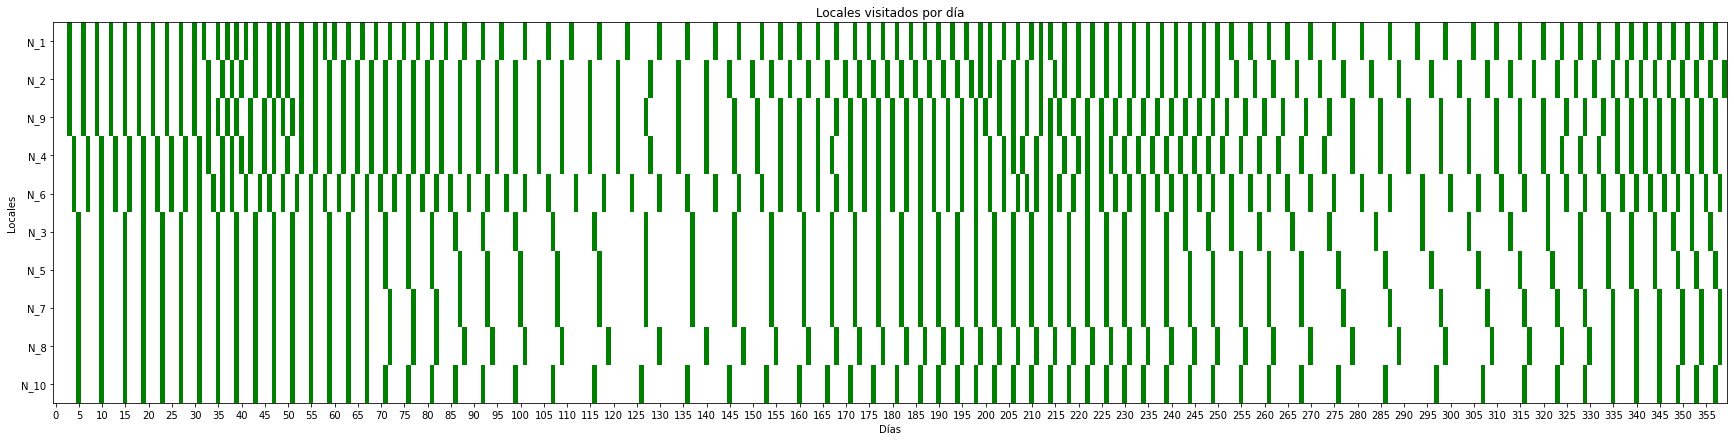

Listo n10full.xlsx


In [25]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}_osc.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'o', T=1000, P=12)
        #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                           tipo_demanda = 'o', T = 360, P=12)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')

In [ ]:
datos_R

In [ ]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 365, F = 5, cap = cap_tpte)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


In [ ]:
list(datos_P.keys())

In [ ]:
inventarios_P = {k: datos_P[k]['inventarios'] for k in list(datos_P.keys())}
inventarios_R = {k: datos_R[k]['inventarios'] for k in list(datos_R.keys())}

In [ ]:
perdidas_P['n10estandar']

In [ ]:


# generamos un dataframe para luego plotear
perdidas_P_1 = np.array(perdidas_P['n20estandar'])
dias = np.arange(1,366)
perdidas_R_1 = np.array(perdidas_R['n20estandar'])
# ahora graficamos
plt.figure(figsize=(15,5))
plt.plot(dias, perdidas_P_1, label = 'Politica P')

plt.plot(dias, perdidas_R_1, label = 'Politica R')

plt.legend()

plt.show()
